In [11]:
import numpy as np 
import pandas as pd 
import os

In [22]:
import sklearn
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import pickle
print(sklearn.__version__)

1.3.2


In [25]:
import matplotlib.pyplot as plt

In [13]:
data_file = pd.read_csv('student-mat.csv', sep=";")

In [14]:
print(data_file.shape)
print(data_file.head)

(395, 33)
<bound method NDFrame.head of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... fa

In [15]:
data_file.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [16]:
data_file = data_file[['studytime','failures','absences', 'G2', 'G3']]

In [17]:
data_file['studytime'].value_counts()

studytime
2    198
1    105
3     65
4     27
Name: count, dtype: int64

In [18]:
data_file.columns

Index(['studytime', 'failures', 'absences', 'G2', 'G3'], dtype='object')

In [19]:
#Building a linear regression model
predict = "G3"

X = np.array(data_file.drop([predict], axis=1))
y = np.array(data_file[predict])
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)

linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)
y_pred = linear.predict(x_test)

mse = metrics.mean_squared_error(y_test, y_pred)
print("MSE:", mse)

with open("gradepredictor.pickle", "wb") as f:
    pickle.dump(linear, f)

MAE:  1.1695352905867922 MSE:  3.950316552568365 RMSE:  1.9875403272810253 R_Squared 0.8129529338225941


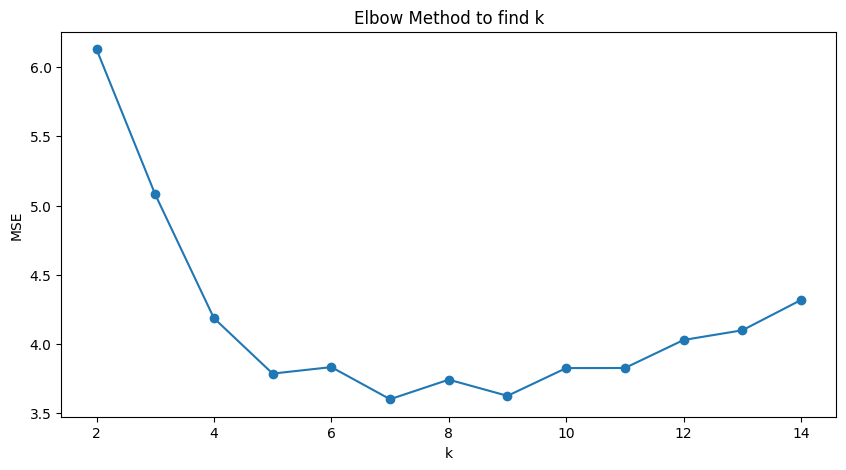

In [32]:
#The elbow method to find the optimal number for k
vals = []

for k in range(2, 15):
    
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    vals.append(metrics.mean_squared_error(y_test, pred))

plt.figure(figsize=(10, 5))
plt.plot(range(2, 15), vals, marker='o')
plt.xlabel('k')
plt.ylabel('MSE')
plt.title('Elbow Method to find k')
plt.show()


In [34]:
#Building a KNN Model
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

mse = mae = metrics.mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MAE:  1.2260397830018086 MSE:  3.6001033324722296 RMSE:  1.897393826403003 R_Squared 0.8295354923299456


In [35]:
randomforest = RandomForestRegressor(n_estimators=100, random_state=42)
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)

mse = metrics.mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MAE:  1.1657829706489429 MSE:  3.7702712356300756 RMSE:  1.9417186293667976 R_Squared 0.8214780603192018


In [20]:
gradepredictor_pickle = open("gradepredictor.pickle", "rb")
gradepredictor_model = pickle.load(gradepredictor_pickle)
new_data = np.array([[4, 0, 30, 12]]) #studytime_value, failures_value, absences_value, G2_value
prediction = gradepredictor_model.predict(new_data)
print(prediction)

[12.31856829]
